# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Aulia Riza Mufita
- **Email:** mufitariza@gmail.com
- **ID Dicoding:** auliariza

## Menentukan Pertanyaan Bisnis

- Bagaimana tren penyewaan sepeda di tahun 2011 dan 2012 menurut kategori casual dan registered user?
- Bagaimana distribusi penyewaan sepeda berdasarkan musim?
- Bagaimana pola penyewaan sepeda antara hari kerja (Workingday), hari libur (Holiday), dan hari biasa (Weekday)?
- Bagaimana hubungan temp, atemp, humidity, dan windspeed terhadapt jumlah penyewa sepeda?

## Import Semua Packages/Library yang Digunakan

Sebelum memulai proyek, langkah pertama yang harus dilakukan adalah mengimport semua library yang akan dibutuhkan untuk mengerjakan proyek tersebut.

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

## Data Wrangling

### Gathering Data

Pada tahap ini, dilakukan pengumpulan data yang akan digunakan di dalam proyek. Pada proyek kali ini, data yang digunakan adalah "Bike Sharing Dataset" yang terdiri dari dua file, yaitu day.csv dan hour.csv

In [6]:
day_df = pd.read_csv("data/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [7]:
hour_df = pd.read_csv("data/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

a) Pada tahap ini, dilakukan pengecekan tipe data dari day_df

In [8]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Setelah dilakukan pengecekan, ditampilkanlah semua tipe data yang digunakan pada setiap kolom dan dapat dilihat bahwa terdapat tipe data yang tidak sesuai pada kolom "dteday". Kolom "dteday" seharusnya menggunakan tipe data "datetime"

b) Pada tahap ini, dilakukan pengecekan missing values pada setiap kolom

In [9]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Setelah dilakukan pengecekan, dapat dilihat bahwa tidak terdapat missing values pada semua kolom

c) Pada tahap ini, dilakukan pengecekan duplicate data

In [10]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


Setelah dilakukan pengecekan, dapat dilihat bahwa tidak terdapat duplicate data dan dapat disimpulkan bahwa semua data bersifat unik

d) Pada tahap ini, dilakukan pengecekan pada nilai statistiknya dengan menggunakan describe

In [11]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Setelah dilakukan pengecekan, dapat dilihat bahwa tidak terdapat kejanggalan pada nilai statistik tersebut

e) Pada tahap ini, dilakukan pengecekan tipe data dari hour_df

In [12]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Setelah dilakukan pengecekan, ditampilkanlah semua tipe data yang digunakan pada setiap kolom dan dapat dilihat bahwa terdapat tipe data yang tidak sesuai pada kolom "dteday". Kolom "dteday" seharusnya menggunakan tipe data "datetime"

f) Pada tahap ini, dilakukan pengecekan missing values pada setiap kolom

In [13]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Setelah dilakukan pengecekan, dapat dilihat bahwa tidak terdapat missing values pada semua kolom

g) Pada tahap ini, dilakukan pengecekan duplicate data

In [14]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


Setelah dilakukan pengecekan, dapat dilihat bahwa tidak terdapat duplicate data dan dapat disimpulkan bahwa semua data bersifat unik

h) Pada tahap ini, dilakukan pengecekan pada nilai statistiknya dengan menggunakan describe

In [15]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Setelah dilakukan pengecekan, dapat dilihat bahwa tidak terdapat kejanggalan pada nilai statistik tersebut

### Cleaning Data

1. Melakukan penghapusan pada tabel data yang tidak digunakan dalam proyek

Pada tahap ini, dilakukan penghapusan tabel data hour (hr_df) dikarenakan tidak relvan dengan proyek yang dibuat

In [17]:
del hour_df

2. Memperjelas beberapa detail pada tabel data day_df

Pada tahap ini, dilakukan beberapa perubahan untuk memperjelas penulisan nama kolom dan juga tipe data sesuai dengan yang dibutuhkan 

In [18]:
# Melakukan perubahan penulisan nama kolom
day_df.rename(columns={
    'dteday': 'date',
    'yr': 'year',
    'mnth': 'month',
    'weathersit': 'weather',
    'hum': 'humidity',
    'cnt': 'count'
}, inplace=True)

# Melakukan perubahan angka pada tabel dengan keterangan yang lebih jelas dan mudah dipahami
day_df['season'] = day_df['season'].map({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})

day_df['year'] = day_df['year'].map({0: '2011', 1: '2012'})

day_df['month'] = day_df['month'].map({1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Des'})

day_df['weekday'] = day_df['weekday'].map({0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'})

day_df['weather'] = day_df['weather'].map({1: 'Clear', 2: 'Mist/Cloudy', 3: 'Light Snow/Rain', 4: 'Heavy Rain'})

day_df.head()

,instant,date,season,year,month,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,2011-01-01,Spring,2011,Jan,0,Sat,0,Mist/Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Spring,2011,Jan,0,Sun,0,Mist/Cloudy,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Spring,2011,Jan,0,Mon,1,Clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Spring,2011,Jan,0,Tue,1,Clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Spring,2011,Jan,0,Wed,1,Clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [19]:
# Melakukan perubahan tipe data
day_df['date'] = pd.to_datetime(day_df.date)
day_df['season'] = day_df.season.astype('category')
day_df['year'] = day_df.year.astype('category')
day_df['month'] = day_df.month.astype('category')
day_df['holiday'] = day_df.holiday.astype('category')
day_df['weekday'] = day_df.weekday.astype('category')
day_df['workingday'] = day_df.workingday.astype('category')
day_df['weather'] = day_df.weather.astype('category')

day_df.head()


,instant,date,season,year,month,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,2011-01-01,Spring,2011,Jan,0,Sat,0,Mist/Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Spring,2011,Jan,0,Sun,0,Mist/Cloudy,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Spring,2011,Jan,0,Mon,1,Clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Spring,2011,Jan,0,Tue,1,Clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Spring,2011,Jan,0,Wed,1,Clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [20]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   date        731 non-null    datetime64[ns]
 2   season      731 non-null    category      
 3   year        731 non-null    category      
 4   month       731 non-null    category      
 5   holiday     731 non-null    category      
 6   weekday     731 non-null    category      
 7   workingday  731 non-null    category      
 8   weather     731 non-null    category      
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  humidity    731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  count       731 non-null    int64         
dtypes: category(7), datetime64

Setelah dilakukan pengecekan, dapat dilihat bahwa terdapat beberapa kolom yang mengalami perubahan tipe data

## Exploratory Data Analysis (EDA)

### Explore day_df

1. Pada tahap ini, dilakukan pengelompokkan penyewa sepeda yang terbagi menjadi penyewa casual dan penyewa registered berdasarkan tahun

In [21]:
day_df.groupby(by='year').agg({
    'casual': ['mean', 'sum'],
    'registered': ['mean', 'sum'],
})

casual           registered         
             mean     sum         mean      sum
year                                           
2011   677.402740  247252  2728.358904   995851
2012  1018.483607  372765  4581.450820  1676811

Berdasarkan pengelompokan data di atas, dapat terlihat bahwa jumlah penyewa casual dan penyewa registered tertinggi terjadi pada tahun 2012

2. Pada tahap ini, dilakukan pengelompokkan penyewa sepeda (penyewa casual dan penyewa registered) berdasarkan hari libur (holiday)

In [22]:
day_df.groupby(by='holiday').agg({
    'count': ['max', 'min', 'mean', 'sum']
})

count                            
          max   min         mean      sum
holiday                                  
0        8714    22  4527.104225  3214244
1        7403  1000  3735.000000    78435

Berdasarkan pengelompokan data di atas, dapat terlihat bahwa jumlah penyewa tertinggi terjadi pada hari biasa/hari kerja daripada hari libur

3. Pada tahap ini, dilakukan pengelompokkan penyewa sepeda (penyewa casual dan penyewa registered) berdasarkan hari biasa (weekday)

In [23]:
day_df.groupby(by='weekday').agg({
    'count': ['max', 'min', 'mean', 'sum']
})

count                           
          max   min         mean     sum
weekday                                 
Fri      8362  1167  4690.288462  487790
Mon      7525    22  4338.123810  455503
Sat      8714   627  4550.542857  477807
Sun      8227   605  4228.828571  444027
Thu      7804   431  4667.259615  485395
Tue      7767   683  4510.663462  469109
Wed      8173   441  4548.538462  473048

Berdasarkan pengelompokan data di atas, dapat terlihat bahwa jumlah penyewa tertinggi terjadi pada hari Jumat (Fri), kemudian disusul oleh hari Kamis (Thu), Sabtu (Sat), Rabu (Wed), Selasa (Tue), Senin (Mon), dan Minggu (Sun)

4. Pada tahap ini, dilakukan pengelompokkan penyewa sepeda (penyewa casual dan penyewa registered) berdasarkan hari kerja (workingday)

In [24]:
day_df.groupby(by='workingday').agg({
    'count': ['max', 'min', 'mean', 'sum']
})

count                           
             max  min         mean      sum
workingday                                 
0           8714  605  4330.168831  1000269
1           8362   22  4584.820000  2292410

Berdasarkan pengelompokan data di atas, dapat terlihat bahwa jumlah penyewa tertinggi terjadi pada hari kerja (workingday) daripada hari lain (non-workingday)

5. Pada tahap ini, dilakukan pengelompokkan penyewa sepeda (penyewa casual dan penyewa registered) berdasarkan musim

In [25]:
day_df.groupby(by='season').agg({
    'count': 'sum'
})

,count
season,
Fall,1061129
Spring,471348
Summer,918589
Winter,841613


Berdasarkan pengelompokan data di atas, dapat terlihat bahwa jumlah penyewa tertinggi terjadi pada musim gugur (Fall), kemudian disisul oleh musim panas (summer), musim dingin (winter), dan musim semi (spring)

6. Pada tahap ini, dilakukan pengelompokkan penyewa sepeda (penyewa casual dan penyewa registered) berdasarkan temp, atemp, humidity, dan windspeed

In [26]:
day_df.groupby(by='season').agg({
    'temp': ['max', 'min', 'mean'],
    'atemp': ['max', 'min', 'mean'],
    'humidity': ['max', 'min', 'mean'],
    'windspeed': ['max', 'min', 'mean'],
    'count': 'sum'
})

temp                         atemp                      humidity  \
             max       min      mean       max       min      mean       max   
season                                                                         
Fall    0.861667  0.469167  0.706309  0.840896  0.242400  0.655898  0.939565   
Spring  0.572500  0.059130  0.297748  0.548617  0.079070  0.296914  0.948261   
Summer  0.808333  0.253043  0.544405  0.757579  0.250339  0.520307  0.922500   
Winter  0.657500  0.220833  0.422906  0.607975  0.227913  0.415539  0.972500   

                           windspeed                        count  
             min      mean       max       min      mean      sum  
season                                                             
Fall    0.360000  0.633482  0.375617  0.064071  0.172095  1061129  
Spring  0.000000  0.582903  0.507463  0.045408  0.214537   471348  
Summer  0.254167  0.626948  0.388067  0.065929  0.203507   918589  
Winter  0.333478  0.668719  0.422275  0.022392  0.171995   841613

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana tren penyewaan sepeda di tahun 2011 dan 2012 menurut kategori casual dan registered user?

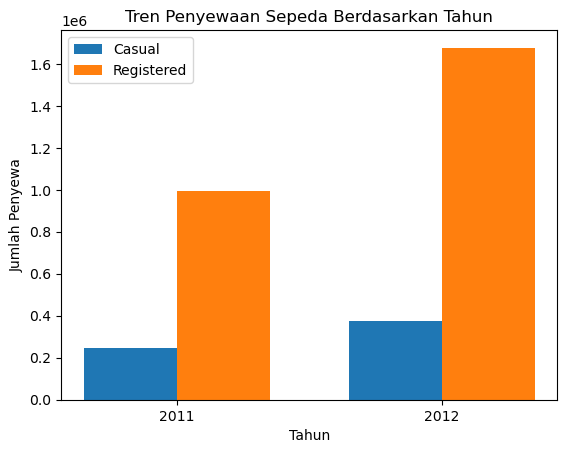

In [28]:
yearly_usage = day_df.groupby('year')[['registered', 'casual']].sum().reset_index()

years = yearly_usage['year']
registered_usage = yearly_usage['registered']
casual_usage = yearly_usage['casual']

bar_width = 0.35

bar_positions_casual = np.arange(len(years))
bar_positions_registered = bar_positions_casual + bar_width

plt.bar(bar_positions_casual, casual_usage, width=bar_width, label='Casual')
plt.bar(bar_positions_registered, registered_usage, width=bar_width, label='Registered')

plt.xlabel('Tahun')
plt.ylabel('Jumlah Penyewa')
plt.title('Tren Penyewaan Sepeda Berdasarkan Tahun')
plt.xticks(bar_positions_casual + bar_width / 2, years)
plt.legend()
plt.show()

### Pertanyaan 2: Bagaimana distribusi penyewaan sepeda berdasarkan musim?

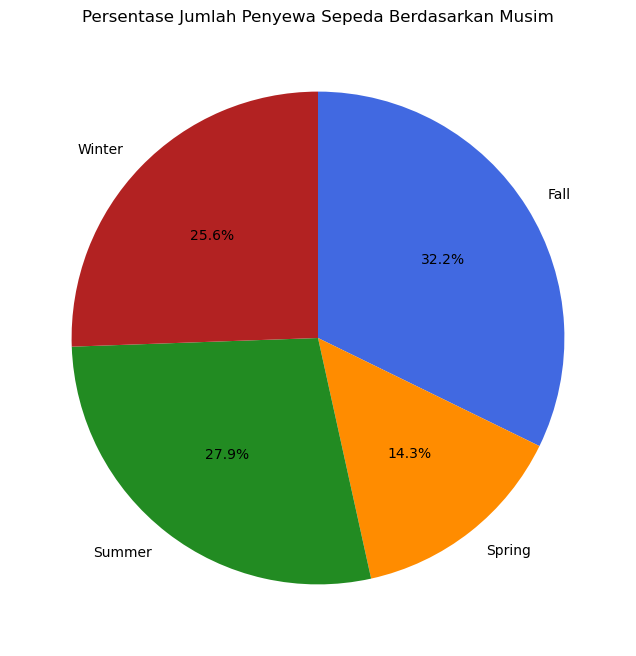

In [29]:
seasonal_usage = day_df.groupby('season')[['count']].sum().reset_index()

seasons = seasonal_usage['season']
registered = seasonal_usage['count']

colors = ['#4169E1', '#FF8C00', '#228B22', '#B22222']

plt.figure(figsize=(8, 8))
plt.pie(registered, labels=seasons, autopct='%1.1f%%', colors=colors, startangle=90, counterclock=False)
plt.title('Persentase Jumlah Penyewa Sepeda Berdasarkan Musim')
plt.show()


### Pertanyaan 3: Bagaimana pola penyewaan sepeda antara hari kerja, hari libur, dan akhir pekan?

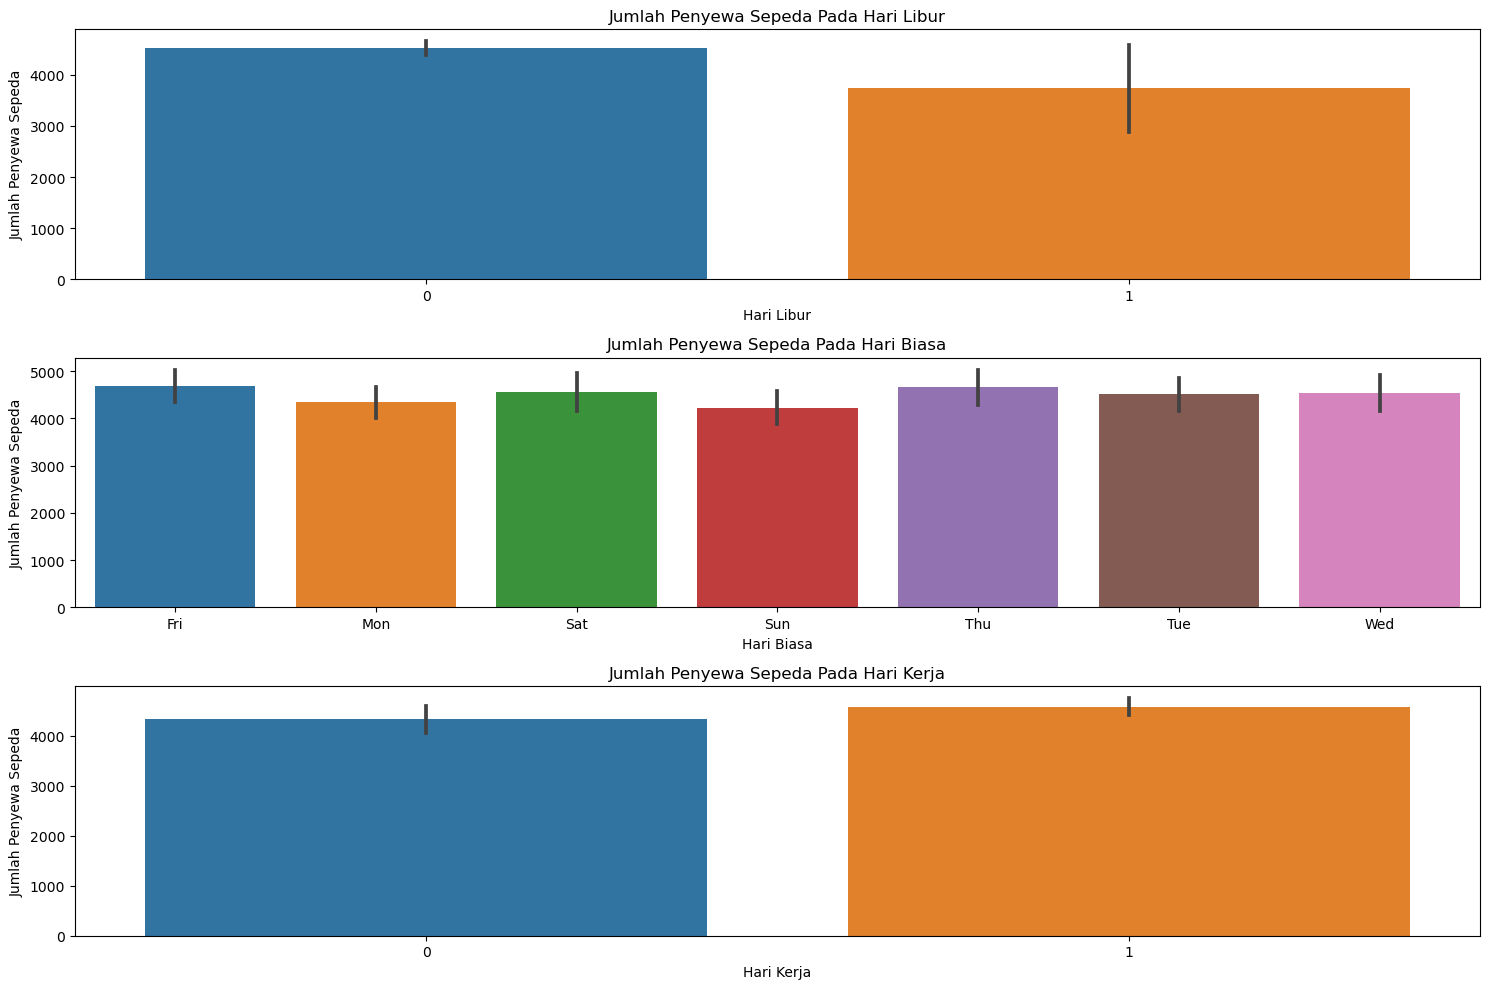

In [30]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(15,10))

sns.barplot(
  x='holiday',
  y='count',
  data=day_df,
  ax=axes[0])
axes[0].set_title('Jumlah Penyewa Sepeda Pada Hari Libur')
axes[0].set_xlabel('Hari Libur')
axes[0].set_ylabel('Jumlah Penyewa Sepeda')

sns.barplot(
  x='weekday',
  y='count',
  data=day_df,
  ax=axes[1])
axes[1].set_title('Jumlah Penyewa Sepeda Pada Hari Biasa')
axes[1].set_xlabel('Hari Biasa')
axes[1].set_ylabel('Jumlah Penyewa Sepeda')

sns.barplot(
    x='workingday',
    y='count',
    data=day_df,
    ax=axes[2])
axes[2].set_title('Jumlah Penyewa Sepeda Pada Hari Kerja')
axes[2].set_xlabel('Hari Kerja')
axes[2].set_ylabel('Jumlah Penyewa Sepeda')

plt.tight_layout()
plt.show()

### Pertanyaan 4: Bagaimana hubungan temp, atemp, humidity, dan windspeed terhadapt jumlah penyewa sepeda?

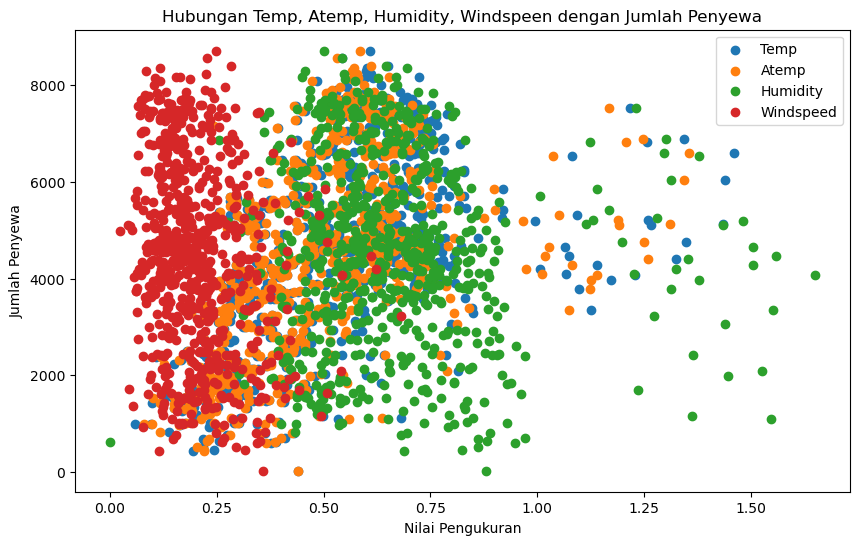

In [31]:
# Data
usage = day_df.groupby('count')[['temp', 'atemp', 'humidity', 'windspeed']].sum().reset_index()

# Scatter Plot
plt.figure(figsize=(10, 6))

# Scatter plot untuk 'temp'
plt.scatter(usage['temp'], usage['count'], label='Temp', marker='o')

# Scatter plot untuk 'atemp'
plt.scatter(usage['atemp'], usage['count'], label='Atemp', marker='o')

# Scatter plot untuk 'humidity'
plt.scatter(usage['humidity'], usage['count'], label='Humidity', marker='o')

# Scatter plot untuk 'windspeed'
plt.scatter(usage['windspeed'], usage['count'], label='Windspeed', marker='o')

# Menambahkan label dan judul
plt.xlabel('Nilai Pengukuran')
plt.ylabel('Jumlah Penyewa')
plt.title('Hubungan Temp, Atemp, Humidity, Windspeen dengan Jumlah Penyewa')
plt.legend()

# Menampilkan plot
plt.show()


## Conclusion

- Conclusion pertanyaan 1: 
Pada visualisasi data yang telah dilakukan, terlihat bahwa secara garis besar jumlah tertinggi penyewa sepeda terjadi pada tahun 2012. Pada setiap tahun, jenis penyewa yang terbagi menjadi 2 macam, yaitu penyewa casual dan penyewa registerd. Jika dilihat dari jenis penyewa tersebut, penyewa registered selalu memiliki jumlah yang paling tinggi dibandingkan dengan penyewa casual pada setiap tahunnya (tahun 2011 dan 2012).
- Conclusion pertanyaan 2: 
Pada visualisasi data yang telah dilakukan, terlihat bahwa pada tahun 2011 dan 2012 penyewaan sepeda tertinggi berdasarkan musim terjadi pada musim gugur (Fall) dengan persentase sebesar 32.2%, kemudian disusul oleh musim panas (Summer) dengan persentase sebesar 27.9%, musim dingin (Winter) dengan persentase sebesar 25.6%, dan musim semi (Spring) dengan persentase sebesar 14.3%. 
- Conclusion pertanyaan 3: 
Pada visualisasi data yang telah dilakukan, terlihat bahwa penyewaan sepeda terbagi menjadi 3 kategori, yaitu pada hari libur (Holiday), hari biasa (Weekday), dan hari kerja (Workingday). Pada kategori hari libur (Holiday), jumlah penyewaan sepeda tertinggi terjadi pada hari biasa/ hari kerja (Non-Holiday) dengan jumlah mencapai di atas 4000 penyewa daripada hari libur (Holiday). Hal tersebut juga terjadi pada kategori hari kerja (Workingday), jumlah penyewaan sepeda tertinggi terjadi pada hari hari kerja (Workingday) dengan jumlah mencapai lebih dari 4000 penyewa daripada hari lain (Non-Workingday). Sedangkan pada kategori hari biasa (Weekday), jumlah penyewaan sepeda tertinggi terjadi pada hari Jumat (Fri) sebanyak 487790 penyewa, kemudian disusul oleh hari Kamis (Thu), Sabtu (Sat), Rabu (Wed), Selasa (Tue), Senin (Mon), dan yang paling rendah pada hari Minggu (Sun) sebanyak 444027 penyewa.
- Conclusion pertanyaan 4: 
Pada visualisasi data yang telah dilakukan, terlihat bahwa temp dan atemp memiliki hubungan positif dengan Jumlah penyewa (count), sehingga jika kedua temperatur (temp dan atemp) tersebut mengalami peningkatan maka penyewa sepeda juga cenderung mengalami peningkatan. Hal tersebut berbanding terbalik dengan humidity, humidity memiliki hubungan negatif dengan jumlah penyewa (count) walaupun tidak terlalu signifikan, namun tetap terjadi penurunan jumlah penyewa sepeda ketika terjadi peningkatan humiditynya. Sedangkan windspeed juga memiliki hubungan negatif dengan jumlah penyewa (count), karena ketika terjadi penurunan windspeed, maka secara signifikan terjadi peningkatan jumlah penyewa.